In [1]:
!pip install textblob

In [2]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [4]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# 2. Data Exploration and Preprocessing
df = pd.read_csv('blogs.csv')

In [7]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [8]:
df.shape

(2000, 2)

In [9]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [10]:
def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers and special characters
    text = re.sub(r'\d+', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [12]:
import nltk
nltk.download('punkt_tab')

print("\nPre-processing text (this may take a minute)...")
df['Cleaned_Data'] = df['Data'].apply(clean_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Pre-processing text (this may take a minute)...


In [13]:
# 3. Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Data'])
y = df['Labels']

In [14]:
# 4. Naive Bayes Model for Text Classification
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [16]:
# Predictions and Evaluation
y_pred = nb_model.predict(X_test)

print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Model Evaluation ---
Accuracy: 0.8425

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.73      0.89      0.80        18
 comp.os.ms-windows.misc       0.91      0.95      0.93        22
comp.sys.ibm.pc.hardware       0.83      0.80      0.82        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.67      0.75      0.71        16
       

In [17]:
# 5. Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Polarity ranges from -1 (negative) to 1 (positive)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

print("\nAnalyzing sentiments...")
df['Sentiment'] = df['Data'].apply(get_sentiment)


Analyzing sentiments...


In [18]:
# Examine distribution of sentiments
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)


Sentiment Distribution:
 Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


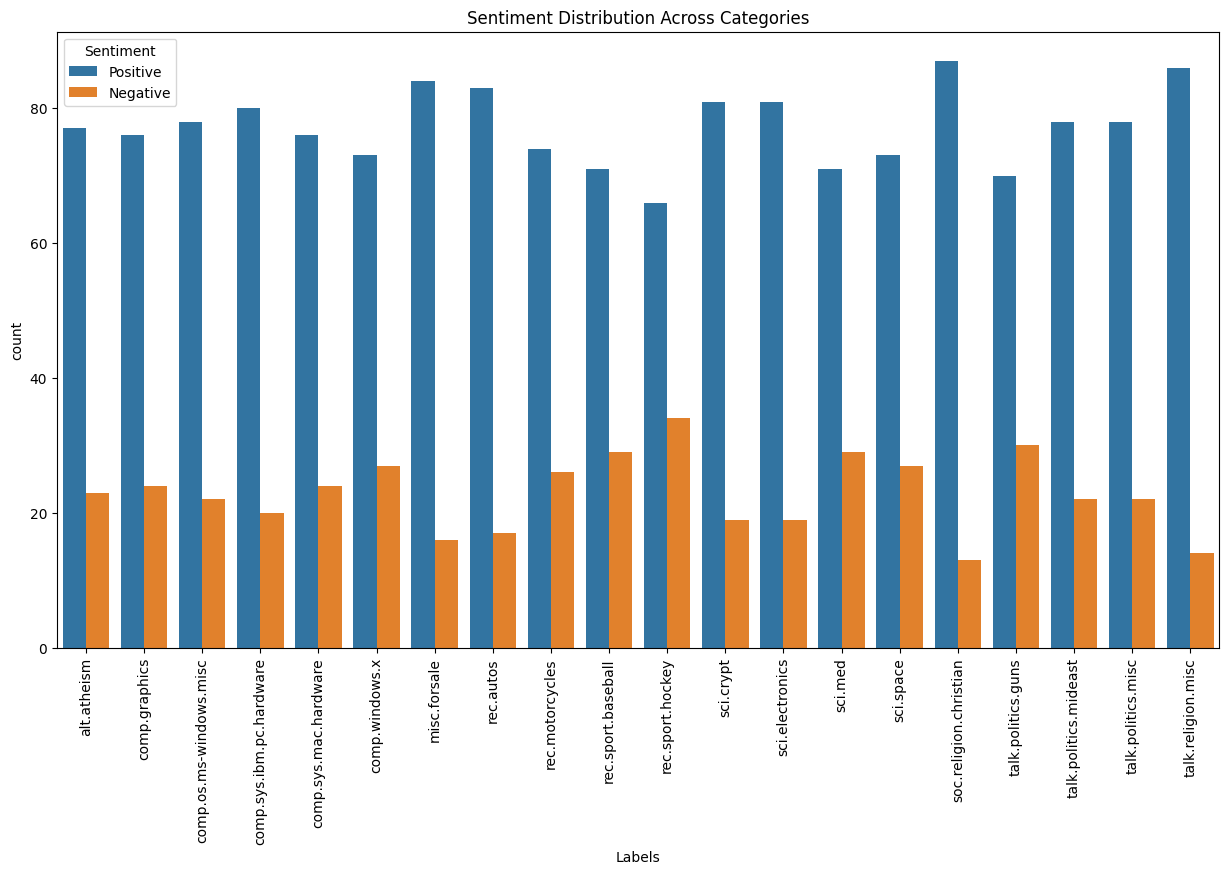

In [19]:
# 6. Sentiment Distribution across Categories
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Labels', hue='Sentiment')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution Across Categories')
plt.show()

In [20]:
# 7. Summary of Findings (Final Task)
print("\n--- Summary and Insights ---")
print("1. Text Classification: The Naive Bayes model categorized the blog posts.")
print("2. Sentiment Analysis: The predominant sentiment observed across the blog posts was " + sentiment_counts.index[0] + ".")
print("3. Observations: Some categories may show stronger leanings toward specific sentiments (e.g., 'Politics' often lean Negative/Neutral, while 'Science' may be Neutral).")


--- Summary and Insights ---
1. Text Classification: The Naive Bayes model categorized the blog posts.
2. Sentiment Analysis: The predominant sentiment observed across the blog posts was Positive.
3. Observations: Some categories may show stronger leanings toward specific sentiments (e.g., 'Politics' often lean Negative/Neutral, while 'Science' may be Neutral).
